# Dataset 2D creating

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio

X = np.random.rand(100,2)
print(X)
X.shape[0]

[[0.67864741 0.10445757]
 [0.89496413 0.32682974]
 [0.43163561 0.78896867]
 [0.45257505 0.79969708]
 [0.77842793 0.61201549]
 [0.14799914 0.65249504]
 [0.14200422 0.52254143]
 [0.27390092 0.52874704]
 [0.2766716  0.09047141]
 [0.43636572 0.36769643]
 [0.13153729 0.63396482]
 [0.58950771 0.62815167]
 [0.15807872 0.70753993]
 [0.08579306 0.79597436]
 [0.46656202 0.40039232]
 [0.06007591 0.68404256]
 [0.06977494 0.57798186]
 [0.94594969 0.85375346]
 [0.91922977 0.28694583]
 [0.8603545  0.75279297]
 [0.65996195 0.99283323]
 [0.16514693 0.92404554]
 [0.82886287 0.68993455]
 [0.766229   0.42809402]
 [0.10726689 0.89211784]
 [0.35141599 0.43601932]
 [0.72231421 0.4079646 ]
 [0.4161699  0.87294572]
 [0.62905403 0.33175738]
 [0.64652919 0.27190981]
 [0.19400014 0.61036211]
 [0.93107562 0.6654212 ]
 [0.98706324 0.04123083]
 [0.70278612 0.28305256]
 [0.13767563 0.99941693]
 [0.49263007 0.57570206]
 [0.71635718 0.17190116]
 [0.9455443  0.97884297]
 [0.20863276 0.23892251]
 [0.90711095 0.20937142]


100

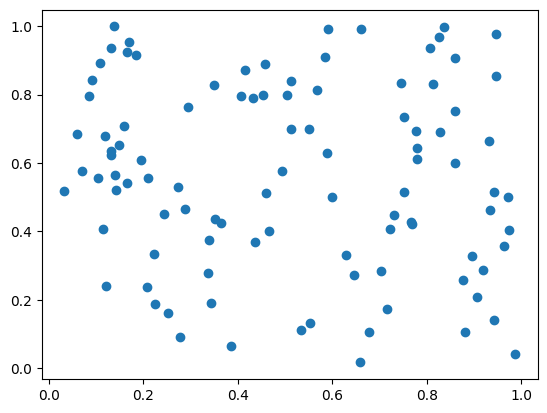

In [2]:
plt.scatter(X[:,0],X[:,1])

# k-means implementation

In [3]:
import numpy as np

def kmeans(X, k, max_iters=100):
    
    X = np.array(X)  # pretvori listu tenzora/vektora u NumPy array
    n_samples = len(X)
    
    X_flat = X.reshape(n_samples, -1) #flattenam podatke da mogu ovaj kmeans koristit za bilo koji tip podataka

    # Inicijalizacija klastera: random stavljam tocke u neke klastere prvo
    cluster_ids = np.random.randint(0, k, size=n_samples)
    
    centroids = np.zeros((k, X_flat.shape[1]))

    for i in range(k):
        points_in_cluster = X_flat[cluster_ids == i]
        if len(points_in_cluster) > 0:
            centroids[i] = points_in_cluster.mean(axis=0)
        else:
            centroids[i] = X_flat[np.random.randint(0, n_samples)]

    for iteration in range(max_iters):

        distances = np.linalg.norm(
            X_flat[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2
        )
        new_cluster_ids = np.argmin(distances, axis=1)

        if np.array_equal(cluster_ids, new_cluster_ids):
            break

        cluster_ids = new_cluster_ids
        
        for i in range(k):
            members = X_flat[cluster_ids == i]
            if len(members) > 0:
                centroids[i] = members.mean(axis=0)
            else:
                centroids[i] = X_flat[np.random.randint(0, n_samples)]

    
    
    return centroids, cluster_ids


# checking k-means for 2D dataset

In [4]:
colors = ['red', 'green', 'blue']  
centroids, partition = kmeans(X, k=3)
centroids 


array([[0.2803007 , 0.75081562],
       [0.83819839, 0.55411436],
       [0.39401388, 0.27060854]])

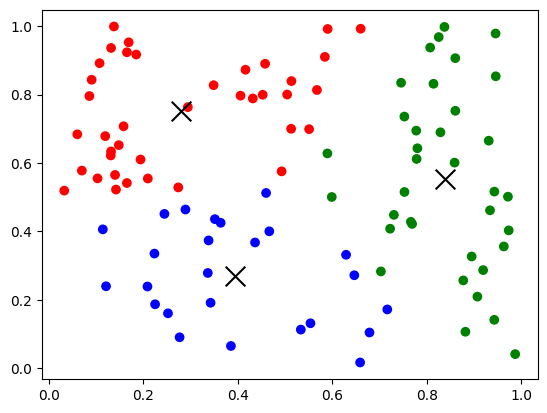

In [5]:
centroids, cluster_ids = kmeans(X, k=3)
plt.scatter(X[:,0],X[:,1], c=[colors[i] for i in cluster_ids])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='black')   

# MNIST dataset
Vec je spremljen u pytorchu jej: https://discuss.pytorch.org/t/loading-mnist-from-pytorch/137456

In [6]:
from torchvision import datasets, transforms
KWARGS = {'root': './data', 'train': True, 'download': True, 'transform': transforms.ToTensor()}
trainset = datasets.MNIST(**KWARGS)

In [11]:
shape = trainset.data.shape
print(shape)
trainset.data[0]
len(trainset.data)


torch.Size([60000, 28, 28])


60000

In [7]:
import numpy
import torch
print(numpy.__version__)
print(torch.__version__)

1.26.4
2.2.2


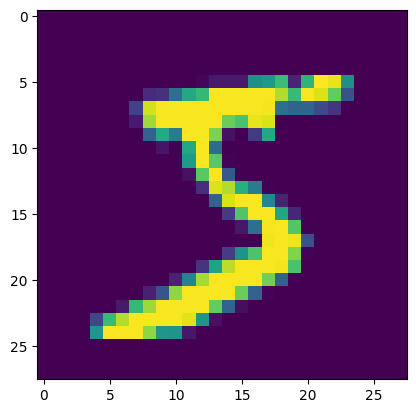

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(trainset.data[0])

# k - means on MNIST

In [40]:

# k - means on MNIST
centroids, partition = kmeans(trainset.data , k=10, max_iters=50 )


In [41]:
len(trainset.targets)

60000

In [42]:
len(partition)

60000

In [43]:
con_matrice = np.zeros((10,10), dtype=int)
for i in range(len(partition)):
    con_matrice[trainset.targets[i]][partition[i]] += 1

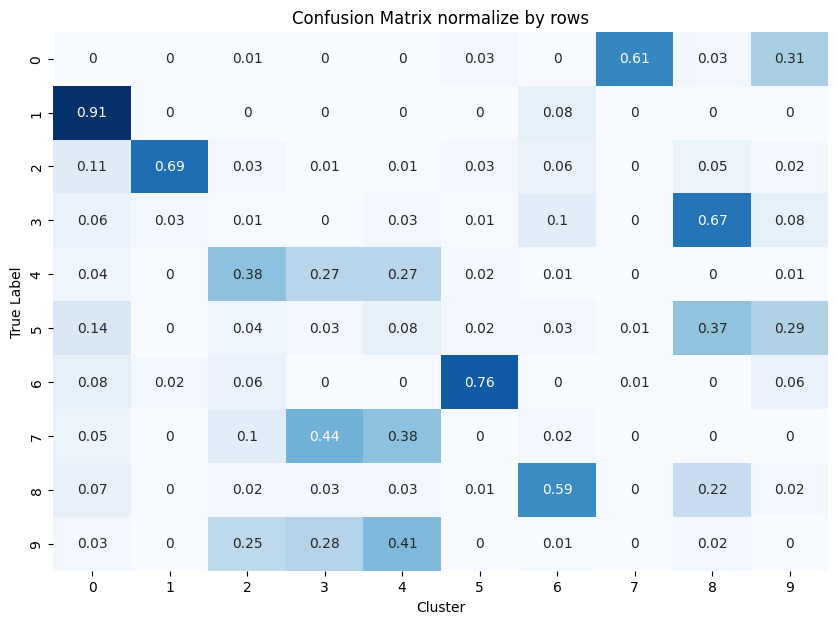

In [44]:
#first normalize rows to sum to 1
row_sums = con_matrice.sum(axis=1, keepdims=True)
con_matrice = con_matrice / row_sums
#round to two decimal places
con_matrice = np.round(con_matrice, 2)

#heatmap of con matrice and show forst two deciamal places
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(con_matrice, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix normalize by rows')
plt.show()


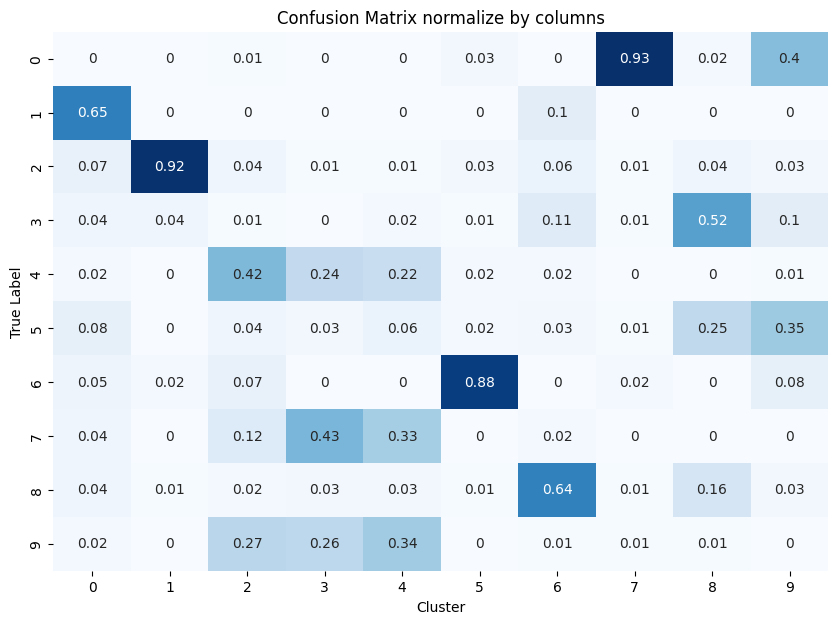

In [45]:
con_matrice = np.zeros((10,10), dtype=int)
for i in range(len(partition)):
    con_matrice[trainset.targets[i]][partition[i]] += 1

#first normalize rows to sum to 1
row_sums = con_matrice.sum(axis=0, keepdims=True)
con_matrice = con_matrice / row_sums
#round to two decimal places
con_matrice = np.round(con_matrice, 2)

#heatmap of con matrice and show forst two deciamal places
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(con_matrice, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix normalize by columns')
plt.show()

In [46]:
#max in each column
for j in range(con_matrice.shape[1]):
    max_index = np.argmax(con_matrice[:,j])
    print(f'Cluster {j} is mostly digit {max_index} with value {con_matrice[max_index][j]}')

Cluster 0 is mostly digit 1 with value 0.65
Cluster 1 is mostly digit 2 with value 0.92
Cluster 2 is mostly digit 4 with value 0.42
Cluster 3 is mostly digit 7 with value 0.43
Cluster 4 is mostly digit 9 with value 0.34
Cluster 5 is mostly digit 6 with value 0.88
Cluster 6 is mostly digit 8 with value 0.64
Cluster 7 is mostly digit 0 with value 0.93
Cluster 8 is mostly digit 3 with value 0.52
Cluster 9 is mostly digit 0 with value 0.4


In [47]:
#table of trainset.targets frequency
import pandas as pd
unique, counts = np.unique(trainset.targets, return_counts=True)
freq_table = pd.DataFrame({'Digit': unique, 'Frequency': counts})
print(freq_table)

   Digit  Frequency
0      0       5923
1      1       6742
2      2       5958
3      3       6131
4      4       5842
5      5       5421
6      6       5918
7      7       6265
8      8       5851
9      9       5949


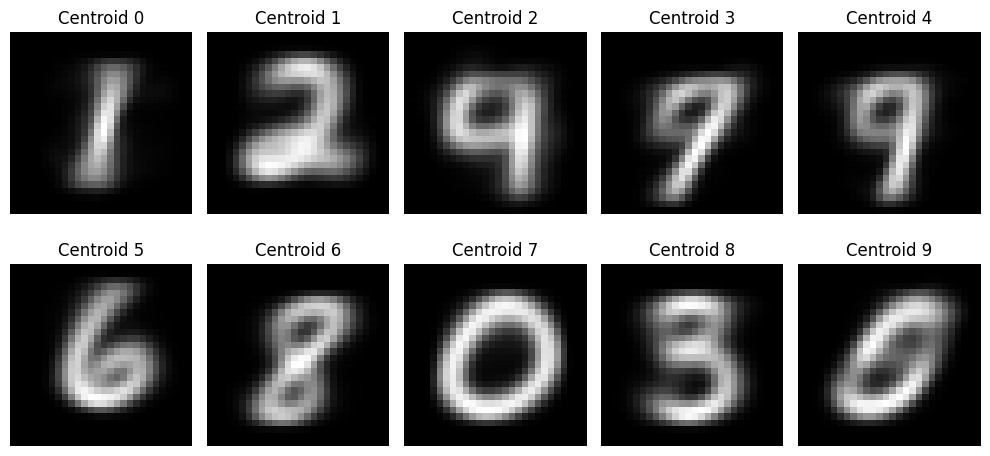

In [48]:
#constructing images of centroids
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(centroids[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Centroid {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()

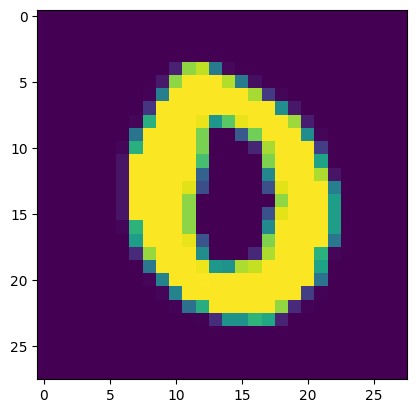

In [181]:
plt.imshow(random.choice(trainset.data[trainset.targets==0]))